# PROJETO DE SOFTWARE PARA ANÁLISE DE TRELIÇAS PLANAS 

Integrantes: 
- Ana Laiz Farias
- Diogo Lobo
- Isabella Amorim
- Tales Ivalque

In [8]:
from math import *
import numpy as np

<center>

![Descrição da Imagem](img/diagrama.png)

</center>


In [9]:
# -*- coding: utf-8 -*-
"""
A funcao 'plota' produz um gráfico da estrutura definida pela matriz de nos N 
e pela incidencia Inc.

Sugestao de uso:

from funcoesTermosol import plota
plota(N,Inc)
-------------------------------------------------------------------------------
A funcao 'importa' retorna o numero de nos [nn], a matriz dos nos [N], o numero
de membros [nm], a matriz de incidencia [Inc], o numero de cargas [nc], o vetor
carregamento [F], o numero de restricoes [nr] e o vetor de restricoes [R] 
contidos no arquivo de entrada.

Sugestao de uso:
    
from funcoesTermosol import importa
[nn,N,nm,Inc,nc,F,nr,R] = importa('entrada.xlsx')
-------------------------------------------------------------------------------
A funcao 'geraSaida' cria um arquivo nome.txt contendo as reacoes de apoio Ft, 
deslocamentos Ut, deformacoes Epsi, forcas Fi e tensoes Ti internas. 
As entradas devem ser vetores coluna.

Sugestao de uso:
    
from funcoesTermosol import geraSaida
geraSaida(nome,Ft,Ut,Epsi,Fi,Ti)
-------------------------------------------------------------------------------

"""
def plota(N,Inc):
    # Numero de membros
    nm = len(Inc[:,0])
    
    import matplotlib as mpl
    import matplotlib.pyplot as plt

#    plt.show()
    fig = plt.figure()
    # Passa por todos os membros
    for i in range(nm):
        
        # encontra no inicial [n1] e final [n2] 
        n1 = int(Inc[i,0])
        n2 = int(Inc[i,1])        

        plt.plot([N[0,n1-1],N[0,n2-1]],[N[1,n1-1],N[1,n2-1]],color='r',linewidth=3)


    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    
def importa(entradaNome):
    
    import numpy as np
    import xlrd
    
    arquivo = xlrd.open_workbook(entradaNome)
    
    ################################################## Ler os nos
    nos = arquivo.sheet_by_name('Nos')
    
    # Numero de nos
    nn = int(nos.cell(1,3).value)
                 
    # Matriz dos nós
    N = np.zeros((2,nn))
    
    for c in range(nn):
        N[0,c] = nos.cell(c+1,0).value
        N[1,c] = nos.cell(c+1,1).value
    
    ################################################## Ler a incidencia
    incid = arquivo.sheet_by_name('Incidencia')
    
    # Numero de membros
    nm = int(incid.cell(1,5).value)
                 
    # Matriz de incidencia
    Inc = np.zeros((nm,4))
    
    for c in range(nm):
        Inc[c,0] = int(incid.cell(c+1,0).value)
        Inc[c,1] = int(incid.cell(c+1,1).value)
        Inc[c,2] = incid.cell(c+1,2).value
        Inc[c,3] = incid.cell(c+1,3).value
    
    ################################################## Ler as cargas
    carg = arquivo.sheet_by_name('Carregamento')
    
    # Numero de cargas
    nc = int(carg.cell(1,4).value)
                 
    # Vetor carregamento
    F = np.zeros((nn*2,1))
    
    for c in range(nc):
        no = carg.cell(c+1,0).value
        xouy = carg.cell(c+1,1).value
        GDL = int(no*2-(2-xouy)) 
        F[GDL-1,0] = carg.cell(c+1,2).value
         
    ################################################## Ler restricoes
    restr = arquivo.sheet_by_name('Restricao')
    
    # Numero de restricoes
    nr = int(restr.cell(1,3).value)
                 
    # Vetor com os graus de liberdade restritos
    R = np.zeros((nr,1))
    
    for c in range(nr):
        no = restr.cell(c+1,0).value
        xouy = restr.cell(c+1,1).value
        GDL = no*2-(2-xouy) 
        R[c,0] = GDL-1


    return nn,N,nm,Inc,nc,F,nr,R

def geraSaida(nome,Ft,Ut,Epsi,Fi,Ti):
    nome = nome + '.txt'
    f = open("saida.txt","w+")
    f.write('Reacoes de apoio [N]\n')
    f.write(str(Ft))
    f.write('\n\nDeslocamentos [m]\n')
    f.write(str(Ut))
    f.write('\n\nDeformacoes []\n')
    f.write(str(Epsi))
    f.write('\n\nForcas internas [N]\n')
    f.write(str(Fi))
    f.write('\n\nTensoes internas [Pa]\n')
    f.write(str(Ti))
    f.close()
    




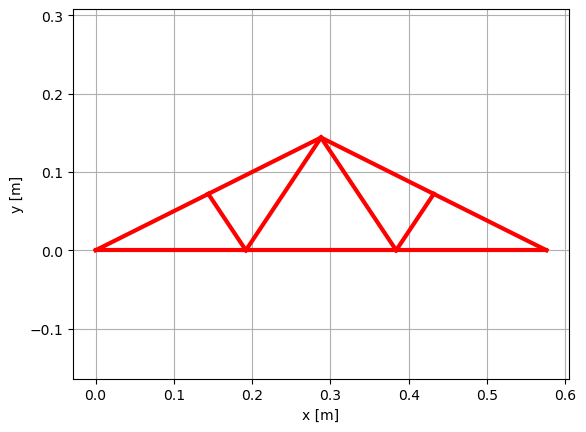

------------------------------------------------------------------Sobre os nós --------------------------------------------------------------------------------
Número total de nós: 7
Coordenadas dos nós: [(0.0, 0.0), (0.144, 0.072), (0.192, 0.0), (0.288, 0.144), (0.384, 0.0), (0.432, 0.072), (0.576, 0.0)]
---------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------Número total de elementos-------------------------------------------------------------------------------------
11
--------------------------------------------------------Matriz de incidência-------------------------------------------------------------------------------------------
[[1.0000e+00 2.0000e+00 1.9314e+11 5.2500e-06]
 [1.0000e+00 3.0000e+00 1.9314e+11 5.2500e-06]
 [2.0000e+00 3.0000e+00 1.9314e+11 5.2500e-06]
 [2.0000e+00 4.0000e+00 1.9314e+11 5.2500e-06]
 [3.0000

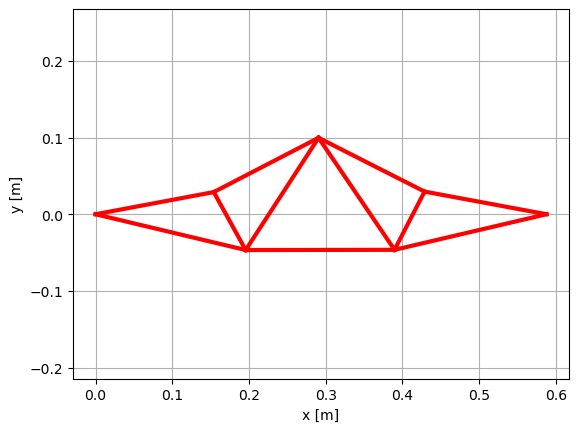

In [23]:
def resolve(erro_limite):
    # Importa dados do arquivo Excel 
    numero_de_nos, coordenadas_nos, num_membros, incidencia_matriz, num_cargas, carga_vetor, num_restricoes, graus = importa("anexo2.xls")

     
    plota(coordenadas_nos, incidencia_matriz)
    
    # informações sobre o material
    modulo_elasticidade = incidencia_matriz[0][2]
    area_secao_transversal = incidencia_matriz[0][3]

    print('------------------------------------------------------------------Sobre os nós --------------------------------------------------------------------------------')
    print("Número total de nós: {}".format(numero_de_nos))
    print("Coordenadas dos nós: {}".format([(coordenadas_nos[0][x], coordenadas_nos[1][x]) for x in range(numero_de_nos)]))
    print('---------------------------------------------------------------------------------------------------------------------------------------------------------------')

    # Cria uma lista de nós e suas coordenadas
    nos = []
    coordenadas_liberdade = []
    for i in range(numero_de_nos):
        # no = (num_nó, x, y)
        no = (i + 1, coordenadas_nos[0][i], coordenadas_nos[1][i])
        nos.append(no)
        coordenadas_liberdade.append(2 * (i + 1) - 2)
        coordenadas_liberdade.append(2 * (i + 1) - 1)

    # Cria uma lista de elementos a partir da matriz de incidência
    elementos = []
    e = 0
    while e < num_membros:
        matriz = incidencia_matriz[e]
        #elemento = (num_elemento, no_inicial-1, no_final-1, modulo_elasticidade, area_secao_transversal)
        elemento = (e, int(matriz[0] - 1), int(matriz[1] - 1), matriz[2], matriz[3])
        elementos.append(elemento)
        e += 1

    print('-------------------------------------------------------Número total de elementos-------------------------------------------------------------------------------------')
    print(num_membros)
    print('--------------------------------------------------------Matriz de incidência-------------------------------------------------------------------------------------------')
    print(incidencia_matriz)

    print('--------------------------------------------------------Número total de carga-----------------------------------------------------------------------------------------')
    print(num_cargas)
    print('--------------------------------------------------------Vetor de carregamento-----------------------------------------------------------------------------------------')
    print(carga_vetor)

    print('-------------------------------------------------------Número total de restrições-------------------------------------------------------------------------------------')
    print(num_restricoes)
    print('----------------------------------------------------------Graus de liberdade------------------------------------------------------------------------------------------')
    print(graus)

    # Cria uma lista de restrições
    lista_de_restricoes = []
    for g in graus:
        lista_de_restricoes.append(int(g[0]))

    # Inicializa um vetor de deslocamento
    deslocamento = np.zeros((numero_de_nos * 2, 1))

    # Inicializa uma matriz global
    matriz_global = np.zeros((numero_de_nos * 2, numero_de_nos * 2))

    # Loop para calcular a matriz global
    for i in range(len(elementos)):
       #grau = matriz das linhas e colunas que serão alteradasq
       #     = [nó_inicial x, nó_inicial y, nó_final x, nó_final y] 
        grau = [2 * elementos[i][1], 2 * elementos[i][1] + 1, 2 * elementos[i][2], 2 * elementos[i][2] + 1]
       #c = cos((atan2((nos[no_final do elemento[i]][2] - nos[no_inicial do elemento[i]][2]), (nos[no_final do elemento[i]][1] - nos[no_inicial do elemento[i]][1]))))
        c = cos((atan2((nos[elementos[i][2]][2] - nos[elementos[i][1]][2]), (nos[elementos[i][2]][1] - nos[elementos[i][1]][1]))))
        s = sin((atan2((nos[elementos[i][2]][2] - nos[elementos[i][1]][2]), (nos[elementos[i][2]][1] - nos[elementos[i][1]][1]))))
        local = np.array([[c ** 2, c * s, -c ** 2, -c * s],
                          [c * s, s ** 2, -c * s, -s ** 2],
                          [-c ** 2, -c * s, c ** 2, c * s],
                          [-c * s, -s ** 2, c * s, s ** 2]])

        matriz_global[np.ix_(grau, grau)] += local * (elementos[i][3] * elementos[i][4] / sqrt((nos[elementos[i][2]][2] - nos[elementos[i][1]][2]) ** 2 + (nos[elementos[i][2]][1] - nos[elementos[i][1]][1]) ** 2))

    # Cria uma cópia da matriz global e do vetor de forças
    nova_matriz = np.copy(matriz_global)
    vetor_forcas = np.copy(carga_vetor)

    # Remove as linhas e colunas correspondentes às restrições da matriz global
    for i in lista_de_restricoes[::-1]:
        nova_matriz = np.delete(nova_matriz, i, 0)
        nova_matriz = np.delete(nova_matriz, i, 1)
        vetor_forcas = np.delete(vetor_forcas, i, 0)

    # Resolve o sistema de equações lineares
    forcas = vetor_forcas[:, 0]
    matriz_auxiliar = np.linalg.solve(nova_matriz, forcas)

    # Preenche o vetor de deslocamento com os resultados
    k = 0
    for i in range(2 * numero_de_nos):
        if i not in lista_de_restricoes:
            deslocamento[i][0] = matriz_auxiliar[k]
            k += 1

    # Imprime os deslocamentos
    print("-------------------------------------------------------------------Deslocamento----------------------------------------------------------------------------------------")
    for i in range(2 * numero_de_nos):
        print(f'Deslocamento : {deslocamento[i][0]}')

    # Calcula as forças nos apoios 
    results = np.dot(matriz_global, deslocamento)
    forca_apoio = []
    for i in lista_de_restricoes:
        forca_apoio.append(results[i, 0])

    print("----------------------------------------------------------------Forças de apoio [N]------------------------------------------------------------------------------------")
    print(forca_apoio)

    # Calcula as deformações de cada elemento
    deformacao = []
    for elemento in elementos:
        c = cos((atan2((nos[elemento[2]][2] - nos[elemento[1]][2]), (nos[elemento[2]][1] - nos[elemento[1]][1]))))
        s = sin((atan2((nos[elemento[2]][2] - nos[elemento[1]][2]), (nos[elemento[2]][1] - nos[elemento[1]][1]))))

        # deslocamento do nó inicial
        u1 = deslocamento[2 * elemento[1]][0]
        v1 = deslocamento[2 * elemento[1] + 1][0]
        u2 = deslocamento[2 * elemento[2]][0]
        v2 = deslocamento[2 * elemento[2] + 1][0]

        l = sqrt((nos[elemento[2]][2] - nos[elemento[1]][2]) ** 2 + (nos[elemento[2]][1] - nos[elemento[1]][1]) ** 2)

        # matriz de deformação
        matriz_deformação = np.array([-c, -s, c, s])

        # vetor de deslocamento
        vetor_deslocamento = [u1, v1, u2, v2]

        # calcula a deformação
        deformacao.append(np.dot(matriz_deformação, vetor_deslocamento)/l)
    
    # Imprime as deformações
    print("---------------------------------------------------------------Deformação []------------------------------------------------------------------------------------------")
    print(deformacao)

    # Calcula as tensões de cada elemento
    sigma = [tensao for tensao in map(lambda x: x * modulo_elasticidade, deformacao)]

    # Imprime as tensões
    print("----------------------------------------------------------------Tensão [Pa]------------------------------------------------------------------------------------------")
    print(sigma)

    # calcula as forças internas aplicadas em cada elemento
    forcas_internas = np.dot(sigma,area_secao_transversal)

    #imprime as forças internas
    print("--------------------------------------------Forças internas [N]------------------------------------------------------------------------------------------------------")
    print(forcas_internas)
    
    novas_coordenadas = coordenadas_nos
    for i in range(len(novas_coordenadas[0])):
        novas_coordenadas[0][i]+=10*deslocamento[2*i][0]
        novas_coordenadas[1][i]+=10*deslocamento[2*i+1][0]
    print(novas_coordenadas)
    plota(novas_coordenadas, incidencia_matriz)
# Chama a função com um limite de erro de 1e-6
resolve(1e-6)